## Assignment 3


In this assignment you will implement a simple Artificial Neural Network (ANN) from scratch (i.e., without using built-in functions). Implement the back-propagation algorithm to learn the weights of an ANN with 2 input nodes, 2 hidden nodes and 1 output node. The hidden layer nodes employ a sigmoid nonlinearity. Use squared-error loss. Train your network to learn the following binary operations:

1. XOR

2. AND 

3. OR 

Since the output is binary (and scalar), choose your $g_k$(·) appropriately. Your code should make the number of nodes a configurable parameter. To generate the dataset, perturb the input binary digits with a small amount of Gaussian noise. Use 80% of the dataset for training and the rest for testing. Report the following:

1. Training and testing loss over training iterations. Plot these values.

2. Training and testing accuracy over training iterations. Plot these values.

3. Print the training and test loss and accuracy at the end of training.

4. Deterministic Gradient Descent: Experiment with the number of training samples n and see how it affects performance. In other words, repeat the training and testing for three different choices of n.

5. Stochastic Gradient Descent: Experiment with the batch size m (for a fixed n) and see how it affects performance. In other words, repeat the training and testing for three different choices of m.

ANN Architecture: 

2 input nodes, say $x_1$, $x_2$.

2 hidden nodes, say $z_1$, $z_2$. (sigmoid activation)

1 output node, say $\hat{y}$. ($g_k$ activation)

This means we have:
\begin{align*}
z_i &= \sigma\left(\alpha_{i0} + \sum^{2}_{j=1}\alpha_{ij}x_j\right) \ i\in {1,2} \\
\hat{y} &= g_k \left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j\right) \\
\implies \hat{y} &= g_k \left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}\left(\sigma\left(\alpha_{j0} + \sum^{2}_{k=1}\alpha_{jk}x_k\right)\right)\right) \\
\end{align*}

As the task beign performed is binary classification i.e., 0 or 1, sigmoid as $g_k$ is a suitable choice. 
We next take a look at the loss function. Given 1 output node and Mean Squared Error.

\begin{equation} 
L\left(\theta\right) = {1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)^2
\end{equation}

Computing gradients, 

\begin{align*}
{\delta L(\theta)\over \delta \alpha_{mp}} &= {\delta\over \delta \alpha_{mp}}\left({1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)^2\right) \text{ where } m\in\{1, 2\} \text{ and } p\in \{0, 1, 2\} \\
&= -2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right){\delta \hat{y}^i\over \delta \alpha_{mp}} \\
&= -2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right){\delta \over \delta \alpha_{mp}}\left(\sigma \left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right)\right) \\
&= -2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'} \left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right){\delta \over \delta \alpha_{mp}}\left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right) \\
&= -2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right)\beta_{m}{\delta \over \delta \alpha_{mp}}\left(z_m^i\right) \\
&= -2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right)\beta_{m}{\delta \over \delta \alpha_{mp}}\left(\sigma\left(\alpha_{m0} + \sum^{2}_{j=1}\alpha_{mj}x_j^i\right)\right) \\
&= -2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right)\beta_{m}\sigma ^{'}\left(\alpha_{m0} + \sum^{2}_{j=1}\alpha_{mj}x_j^i\right){\delta \over \delta \alpha_{mp}}\left(\alpha_{m0} + \sum^{2}_{j=1}\alpha_{mj}x_j^i\right) \\
&= 
\begin{cases} 
-2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right)\beta_{m}\sigma ^{'}\left(\alpha_{m0} + \sum^{2}_{j=1}\alpha_{mj}x_j^i\right) & \text{ if } p = 0 \\
-2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right)\beta_{m}\sigma^{'}\left(\alpha_{m0} + \sum^{2}_{j=1}\alpha_{mj}x_j^i\right)x_p^i & \text{ if } p = \{1,2\} \\
\end{cases} \\

{\delta L(\theta)\over \delta \beta_{k}} &= {\delta\over \delta \beta_{k}}\left({1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)^2\right) \text{ where } k\in\{0, 1, 2\} \\
&= -2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right){\delta \hat{y}^i\over \delta \beta_{k}} \\
&= -2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right){\delta \over \delta \beta_{k}}\left(\sigma \left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right)\right) \\
&= -2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'} \left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right){\delta \over \delta \beta_{k}}\left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right) \\
&= 
\begin{cases} 
-2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right) & \text{ if } k = 0 \\
-2*{1\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(\beta_{0} + \sum^{2}_{j=1}\beta_{j}z_j^i\right)z_j^i & \text{ if } k = \{1,2\} \\
\end{cases}
\end{align*} 

If written in matrix multiplication form, we have 

\begin{align*}
\begin{bmatrix} z_1 \\ z_2 \end{bmatrix} &= \sigma \left(\begin{bmatrix} \alpha_{11} & \alpha_{12} \\ \alpha_{21} & \alpha_{22} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} \alpha_{10} \\ \alpha_{20} \end{bmatrix}\right) \\
y &= \sigma \left(\begin{bmatrix} \beta_{1} & \beta_{2}\end{bmatrix} \begin{bmatrix} z_1 \\ z_2 \end{bmatrix} + \begin{bmatrix} \beta_{0}\end{bmatrix}\right) \\
\implies y &= \sigma \left(\begin{bmatrix} \beta_{1} & \beta_{2}\end{bmatrix} \sigma \left(\begin{bmatrix} \alpha_{11} & \alpha_{12} \\ \alpha_{21} & \alpha_{22} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} \alpha_{10} \\ \alpha_{20} \end{bmatrix}\right) + \begin{bmatrix} \beta_{0}\end{bmatrix}\right) \\
\implies \hat{y} &= \sigma \left(W^{(2)} \sigma \left(W^{(1)} \bar{X} + \bar{b}^{(1)}\right) + \bar{b}^{(2)}\right) \\
\end{align*}

where $W^{(1)}$ and $b^{(1)}$ are the weights and biases corresponding to layer 1 and $W^{(2)}$ and $b^{(2)}$ correspond to layer 2. From the gradients as computed above, we have 

\begin{align*}

{\delta L(\theta)\over \delta W^{(1)}} &= \begin{bmatrix}{\delta L(\theta)\over \delta \alpha_{11}} & {\delta L(\theta)\over \delta \alpha_{12}}\\{\delta L(\theta)\over \delta \alpha_{21}} & {\delta L(\theta)\over \delta \alpha_{22}}\end{bmatrix} = {-2\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(W^{(2)} \sigma \left(W^{(1)} \bar{X}^i + \bar{b}^{(1)}\right)+ \bar{b}^{(2)}\right)\left(\left(W^{(2)}\odot \sigma ^{'}\left(W^{(1)} \bar{X}^i + \bar{b}^{(1)}\right)\right) \otimes \bar{X}^i\right) \\
{\delta L(\theta)\over \delta b^{(1)}} &= \begin{bmatrix}{\delta L(\theta)\over \delta \alpha_{10}}\\{\delta L(\theta)\over \delta \alpha_{20}} \end{bmatrix} = {-2\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(W^{(2)} \sigma \left(W^{(1)} \bar{X}^i + \bar{b}^{(1)}\right)+ \bar{b}^{(2)}\right)\left(W^{(2)}\odot \sigma ^{'}\left(W^{(1)} \bar{X}^i + \bar{b}^{(1)}\right)\right) \\
{\delta L(\theta)\over \delta W^{(2)}} &= \begin{bmatrix}{\delta L(\theta)\over \delta \beta_1}\\{\delta L(\theta)\over \delta \beta_2} \end{bmatrix} = {-2\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(W^{(2)} \sigma \left(W^{(1)} \bar{X}^i + \bar{b}^{(1)}\right) + \bar{b}^{(2)}\right)\sigma \left(W^{(1)} \bar{X}^i + \bar{b}^{(1)}\right) \\
{\delta L(\theta)\over \delta b^{(2)}} &= {\delta L(\theta)\over \delta \beta_0} = {-2\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(W^{(2)} \sigma \left(W^{(1)} \bar{X}^i + \bar{b}^{(1)}\right) + \bar{b}^{(2)}\right) \\

\end{align*}

As the terms $\left(W^{(2)} \sigma \left(W^{(1)} \bar{X}^i + \bar{b}^{(1)}\right) + \bar{b}^{(2)}\right)$ and $\left(W^{(1)} \bar{X}^i + \bar{b}^{(1)}\right)$ are repetitive, use $h_2^i$ and $\bar{h}_1^i$ respectively to denote them for simplified notation i.e., 

\begin{align*}

{\delta L(\theta)\over \delta W^{(1)}} &= \begin{bmatrix}{\delta L(\theta)\over \delta \alpha_{11}} & {\delta L(\theta)\over \delta \alpha_{12}}\\{\delta L(\theta)\over \delta \alpha_{21}} & {\delta L(\theta)\over \delta \alpha_{22}}\end{bmatrix} = {-2\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(h_2^i\right)\left(\left(W^{(2)}\odot \sigma ^{'}\left(\bar{h}_1^i\right)\right) \otimes \bar{X}^i\right) \\
{\delta L(\theta)\over \delta b^{(1)}} &= \begin{bmatrix}{\delta L(\theta)\over \delta \alpha_{10}}\\{\delta L(\theta)\over \delta \alpha_{20}} \end{bmatrix} = {-2\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(h_2^i\right)\left(W^{(2)}\odot \sigma ^{'}\left(\bar{h}_1^i\right)\right) \\
{\delta L(\theta)\over \delta W^{(2)}} &= \begin{bmatrix}{\delta L(\theta)\over \delta \beta_1}\\{\delta L(\theta)\over \delta \beta_2} \end{bmatrix} = {-2\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(h_2^i\right)\sigma \left(\bar{h}_1^i\right) \\
{\delta L(\theta)\over \delta b^{(2)}} &= {\delta L(\theta)\over \delta \beta_0} = {-2\over n_{tr}}\sum_{i=1}^{n_{tr}}\left(y^i-\hat{y}^i\right)\sigma ^{'}\left(h_2^i\right) \\

\end{align*}

In [285]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [286]:
##ANN Architecture for a 2 layer neural network - 1 hidden layer and 1 output layer
class ANN:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        #Initialize the number of nodes in each layer
        self.input = input_nodes
        self.hidden = hidden_nodes
        self.output = output_nodes
        
        #Initialize the weights and biases for each layer
        self.W1 = np.random.randn(self.hidden, self.input)
        self.b1 = np.random.randn(self.hidden, 1)
        self.W2 = np.random.randn(self.output, self.hidden)
        self.b2 = np.random.randn(self.output, 1)
        
        #Initialize the hidden layer and output layer outputs before and post activation
        self.h1 = None #Dim: same as b1
        self.a1 = None #Activation of h1
        self.h2 = None #Dim: same as b2
        self.y_hat = None #Activation of h2
        
        #Track loss and accuracy per epoch
        self.loss_per_epoch = []
        self.accuracy_per_epoch = []
        self.loss_test = []
        self.accuracy_test = []
        
    #Define the activation function - Sigmoid
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    #Forward propagation through the network
    def forwardprop(self, X):
        self.h1 = self.W1 @ X.T + self.b1 #as X is a row vector, we need to transpose it
        self.a1 = self.sigmoid(self.h1)
        self.h2 = self.W2 @ self.a1 + self.b2 #No need to transpose as a1 is a column vector
        self.y_hat = self.sigmoid(self.h2)
        
        return self.y_hat
    
    #Define the loss function - MSE
    def loss_function(self, y, y_hat):
        return np.mean((y.T - y_hat)**2) #Transpose y to make it a column vector
    
    #Define the accuracy function
    def accuracy(self, y, y_hat):
        y_hat = np.round(y_hat).astype(int)
        return np.mean(y.T == y_hat)
    
    #Derivative of the activation function used
    def sigmoid_derivative(self, x):
        sigmoid_activation = self.sigmoid(x)
        return sigmoid_activation * (1 - sigmoid_activation)
    
    #Backpropagation through the network - Update the weights and biases using the gradients
    def backprop(self, x, y, y_hat, learning_rate):
        y = y.T
        
        helper1 = -2*(y - y_hat)*self.sigmoid_derivative(self.h2)/len(y)
        db2 = np.sum(helper1, axis = 1, keepdims = True)
        dW2 = helper1 @ self.a1.T
        
        helper2 = (self.W2.T @ helper1) * self.sigmoid_derivative(self.h1)
        db1 = np.sum(helper2, axis = 1, keepdims = True)
        dW1 = helper2 @ x
        
        self.W1 -= learning_rate*dW1
        self.b1 -= learning_rate*db1
        self.W2 -= learning_rate*dW2
        self.b2 -= learning_rate*db2
    
    #Shuffle the dataset
    def shuffle(self, X, y):
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        return X[indices], y[indices]
    
    #Train the model
    def train(self, dataset, train_fraction, epochs, learning_rate, batch_size = 0, verbose = False):
        X, y = dataset
        train_size = int(train_fraction * len(X))
        X_train, y_train = X[:train_size], y[:train_size]
        X_test, y_test = X[train_size:], y[train_size:]
        
        if batch_size == 0:
            batch_size = len(X_train)
        
        for epoch in range(epochs):
            X_train, y_train = self.shuffle(X_train, y_train)
            all_predictions = []
            
            for i in range(0, len(X_train), batch_size):
                X_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
                
                y_hat = self.forwardprop(X_batch)
                self.backprop(X_batch, y_batch, y_hat, learning_rate)
                
                all_predictions.append(y_hat.T)
            
            all_predictions = np.concatenate(all_predictions, axis=0)
            self.loss_per_epoch.append(self.loss_function(y_train, all_predictions.T))
            self.accuracy_per_epoch.append(self.accuracy(y_train, all_predictions.T))
            
            self.evaluate(X_test, y_test)
            
            if verbose and epoch % 20 == 0:
                    print(f"Epoch {epoch}: Loss = {self.loss_per_epoch[-1]},  Accuracy = {self.accuracy_per_epoch[-1]}, Test Loss = {self.loss_test[-1]}, Test Accuracy = {self.accuracy_test[-1]}")
            
    #Evaluate the model on the test set
    def evaluate(self, X_test, y_test):
        y_hat = self.forwardprop(X_test)
        self.loss_test.append(self.loss_function(y_test, y_hat))
        self.accuracy_test.append(self.accuracy(y_test, y_hat))

In [287]:
def plotPredictionsvsOriginal(model, X, y):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.scatter(X[:,0][y==0], X[:,1][y==0], color = 'red', label = 'Class 0')
    plt.scatter(X[:,0][y==1], X[:,1][y==1], color = 'blue', label = 'Class 1')
    plt.title('Original')
    plt.legend()
    
    y_hat = model.forwardprop(X)
    y_hat = np.round(y_hat).astype(int)
    y_hat = y_hat.reshape(-1)
    
    plt.subplot(1,2,2)
    plt.scatter(X[:,0][y_hat==0], X[:,1][y_hat==0], color = 'red', label = 'Class 0')
    plt.scatter(X[:,0][y_hat==1], X[:,1][y_hat==1], color = 'blue', label = 'Class 1')
    plt.title('Predicted')
    plt.legend()
    
    plt.show()

In [288]:
#Generate the dataset
def OR_dataset(N):
    input = np.random.randint(0, 2, (N, 2)).astype(float)
    output = np.logical_or(input[:, 0], input[:, 1])
    input += np.random.normal(0, 0.1, input.shape)
    
    return input, output

def AND_dataset(N):
    input = np.random.randint(0, 2, (N, 2)).astype(float)
    output = np.logical_and(input[:, 0], input[:, 1])
    input += np.random.normal(0, 0.1, input.shape)
    
    return input, output

def XOR_dataset(N):
    input = np.random.randint(0, 2, (N, 2)).astype(float)
    output = np.logical_xor(input[:, 0], input[:, 1])
    input += np.random.normal(0, 0.1, input.shape)
    
    return input, output

Epoch 0: Loss = 0.17419540569655162,  Accuracy = 0.758875, Test Loss = 0.17522636096854108, Test Accuracy = 0.7425
Epoch 20: Loss = 0.024307340846322776,  Accuracy = 0.999625, Test Loss = 0.023844952465416423, Test Accuracy = 1.0
Epoch 40: Loss = 0.008302695340317164,  Accuracy = 0.99975, Test Loss = 0.008181833251377646, Test Accuracy = 1.0
Epoch 60: Loss = 0.004780643147378697,  Accuracy = 0.99975, Test Loss = 0.004670840155427041, Test Accuracy = 1.0
Epoch 80: Loss = 0.003335551180203186,  Accuracy = 0.99975, Test Loss = 0.0032227940729122073, Test Accuracy = 1.0
Epoch 100: Loss = 0.0025635876413440755,  Accuracy = 0.99975, Test Loss = 0.002448544022689032, Test Accuracy = 1.0
Epoch 120: Loss = 0.00208715188275956,  Accuracy = 0.99975, Test Loss = 0.001970542185783473, Test Accuracy = 1.0
Epoch 140: Loss = 0.0017651500515404584,  Accuracy = 0.99975, Test Loss = 0.0016475075648503773, Test Accuracy = 1.0
Epoch 160: Loss = 0.0015334305594042618,  Accuracy = 0.99975, Test Loss = 0.0014

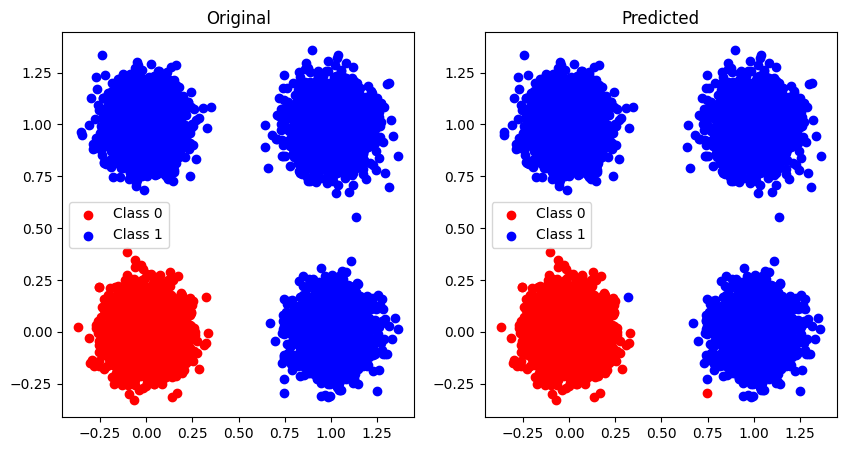

In [289]:
#Initialize the model
model_OR = ANN(2, 2, 1)

X, y = OR_dataset(10000)
train_fraction = 0.8
epochs = 500
lr = 0.1
batch_size = 64

model_OR.train((X, y), train_fraction, epochs, lr, batch_size, verbose = True)
plotPredictionsvsOriginal(model_OR, X, y)

In [290]:
print("OR Gate Implementation")
print(f"Final Loss: {model_OR.loss_per_epoch[-1]}")
print(f"Final Accuracy: {model_OR.accuracy_per_epoch[-1]}")

OR Gate Implementation
Final Loss: 0.0005414339306774988
Final Accuracy: 0.99975


Epoch 0: Loss = 0.1937658579470949,  Accuracy = 0.756125, Test Loss = 0.20357689490855035, Test Accuracy = 0.7355
Epoch 20: Loss = 0.054373406047147514,  Accuracy = 0.998125, Test Loss = 0.053877843116677496, Test Accuracy = 1.0
Epoch 40: Loss = 0.01284822977756329,  Accuracy = 0.999875, Test Loss = 0.013052763543061216, Test Accuracy = 1.0
Epoch 60: Loss = 0.006504463967319309,  Accuracy = 0.999875, Test Loss = 0.006559388547980172, Test Accuracy = 1.0
Epoch 80: Loss = 0.00429863760683867,  Accuracy = 1.0, Test Loss = 0.004262677026601985, Test Accuracy = 1.0
Epoch 100: Loss = 0.003212829021573882,  Accuracy = 1.0, Test Loss = 0.003125862159624896, Test Accuracy = 1.0
Epoch 120: Loss = 0.002574803368560228,  Accuracy = 1.0, Test Loss = 0.002454958436383328, Test Accuracy = 1.0
Epoch 140: Loss = 0.0021553956347728827,  Accuracy = 1.0, Test Loss = 0.002015254201503746, Test Accuracy = 1.0
Epoch 160: Loss = 0.001860206953708663,  Accuracy = 1.0, Test Loss = 0.001705678231373224, Test Acc

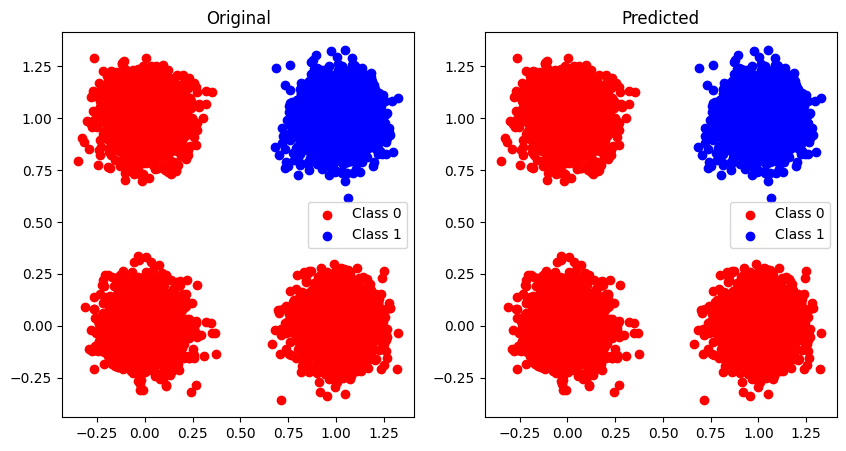

In [291]:
model_AND = ANN(2, 2, 1)

X, y = AND_dataset(10000)
train_fraction = 0.8
epochs = 500
lr = 0.1
batch_size = 64

model_AND.train((X, y), train_fraction, epochs, lr, batch_size, verbose = True)
plotPredictionsvsOriginal(model_AND, X, y)

In [292]:
print("AND Gate Implementation")
print(f"Final Loss: {model_AND.loss_per_epoch[-1]}")
print(f"Final Accuracy: {model_AND.accuracy_per_epoch[-1]}")

AND Gate Implementation
Final Loss: 0.0006345420176827253
Final Accuracy: 1.0


Epoch 0: Loss = 0.28864136759951387,  Accuracy = 0.504125, Test Loss = 0.2561353764001375, Test Accuracy = 0.497
Epoch 20: Loss = 0.24597754585281684,  Accuracy = 0.51375, Test Loss = 0.2456554353889486, Test Accuracy = 0.4925
Epoch 40: Loss = 0.1949738879945212,  Accuracy = 0.749125, Test Loss = 0.19475784202824367, Test Accuracy = 0.744
Epoch 60: Loss = 0.10584338753334618,  Accuracy = 0.9935, Test Loss = 0.10369433356806085, Test Accuracy = 0.9975
Epoch 80: Loss = 0.039683594917874904,  Accuracy = 0.99875, Test Loss = 0.03861738099567276, Test Accuracy = 1.0
Epoch 100: Loss = 0.020654649939680074,  Accuracy = 0.99925, Test Loss = 0.019999992873135055, Test Accuracy = 1.0
Epoch 120: Loss = 0.013429380928615658,  Accuracy = 0.999375, Test Loss = 0.012888142585232035, Test Accuracy = 1.0
Epoch 140: Loss = 0.009842789550692128,  Accuracy = 0.999375, Test Loss = 0.009350627587211011, Test Accuracy = 1.0
Epoch 160: Loss = 0.007750008888444073,  Accuracy = 0.9995, Test Loss = 0.00728307786

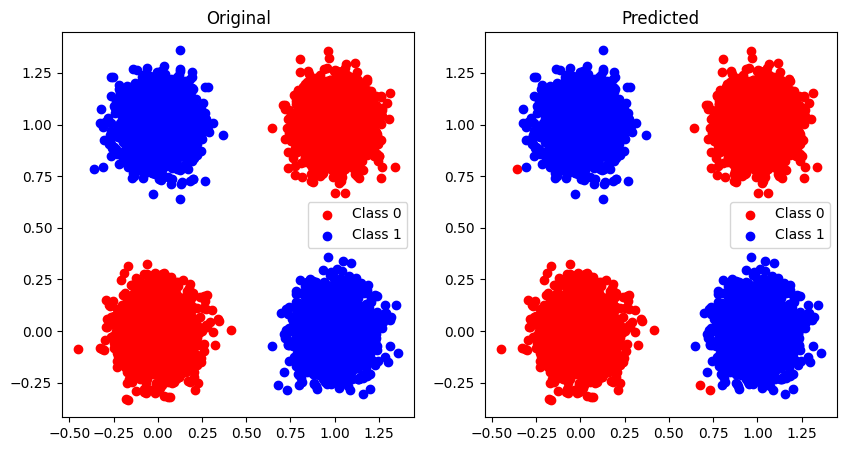

In [293]:
X, y = XOR_dataset(10000)
model_XOR = ANN(2, 2, 1)
train_fraction = 0.8
epochs = 500
lr = 0.1
batch_size = 64

model_XOR.train((X, y), train_fraction, epochs, lr, batch_size, verbose = True)
plotPredictionsvsOriginal(model_XOR, X, y)

In [294]:
print("XOR Gate Implementation")
print(f"Final Loss: {model_XOR.loss_per_epoch[-1]}")
print(f"Final Accuracy: {model_XOR.accuracy_per_epoch[-1]}")

XOR Gate Implementation
Final Loss: 0.0018879375674993172
Final Accuracy: 0.999625


Note that the results show that AND and OR logics are much easier to understand as compared to XOR. (for a fixed, learning rate, number of samples, and batch size)

In order to obtain better results, a change in hyperparameters would be needed.

In [295]:
def plotLoss(loss_per_epoch, test_loss, num_samples, epochs):
    colors = ['red', 'blue', 'green']
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    for i in range(len(num_samples)):
        plt.plot(loss_per_epoch[i], label = f"Hyperparameters {i}", color = colors[i])
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    for i in range(len(num_samples)):
        plt.plot(test_loss[i], label = f"Hyperparameters {i}", color = colors[i])
    plt.title('Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

In [296]:
def plotAccuracy(accuracy_per_epoch, test_accuracy, num_samples, epochs):
    colors = ['red', 'blue', 'green']
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    for i in range(len(num_samples)):
        plt.plot(accuracy_per_epoch[i], label = f"Hyperparameters {i}", color = colors[i])
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1,2,2)
    for i in range(len(num_samples)):
        plt.plot(test_accuracy[i], label = f"Hyperparameters {i}", color = colors[i])
    plt.title('Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

In [297]:
num_samples = [100, 1000, 10000]
train_fraction = 0.8
epochs = 1000
lr = 1
batch_size = 0

loss_per_epoch = []
test_loss = []
accuracy_per_epoch = []
test_accuracy = []

for N in num_samples:
    X, y = OR_dataset(N)
    model_OR = ANN(2, 2, 1)
    model_OR.train((X, y), train_fraction, epochs, lr, batch_size, verbose = False)
    loss_per_epoch.append(model_OR.loss_per_epoch)
    test_loss.append(model_OR.loss_test)
    accuracy_per_epoch.append(model_OR.accuracy_per_epoch)
    test_accuracy.append(model_OR.accuracy_test)

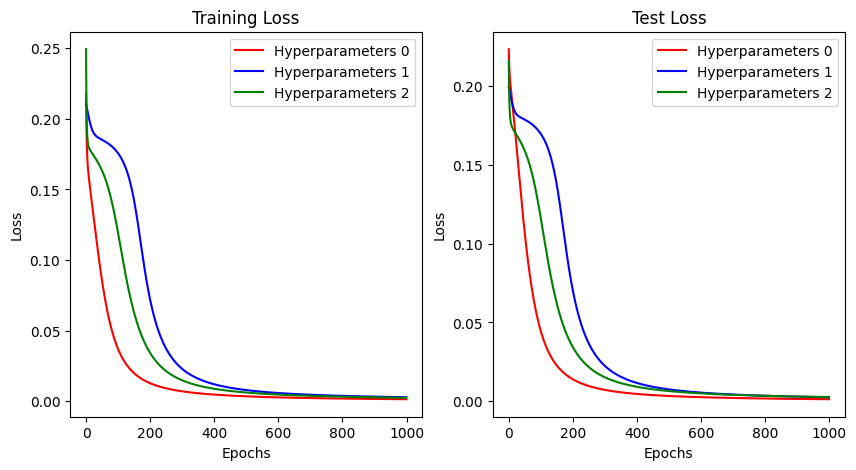

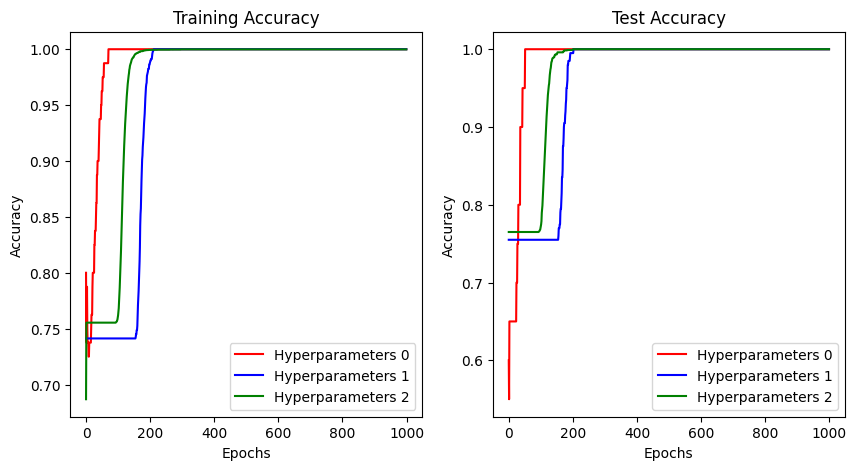

In [298]:
plotLoss(loss_per_epoch, test_loss, num_samples, epochs)
plotAccuracy(accuracy_per_epoch, test_accuracy, num_samples, epochs)

In [299]:
num_samples = [100, 1000, 10000]
train_fraction = 0.8
epochs = 1000
lr = 1
batch_size = 0

loss_per_epoch = []
test_loss = []
accuracy_per_epoch = []
test_accuracy = []

for N in num_samples:
    X, y = AND_dataset(N)
    model_AND = ANN(2, 2, 1)
    model_AND.train((X, y), train_fraction, epochs, lr, batch_size, verbose = False)
    loss_per_epoch.append(model_AND.loss_per_epoch)
    test_loss.append(model_AND.loss_test)
    accuracy_per_epoch.append(model_AND.accuracy_per_epoch)
    test_accuracy.append(model_AND.accuracy_test)

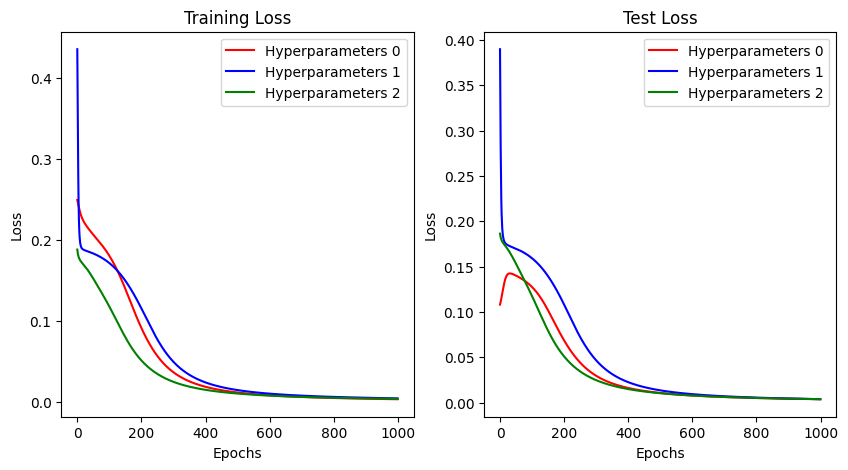

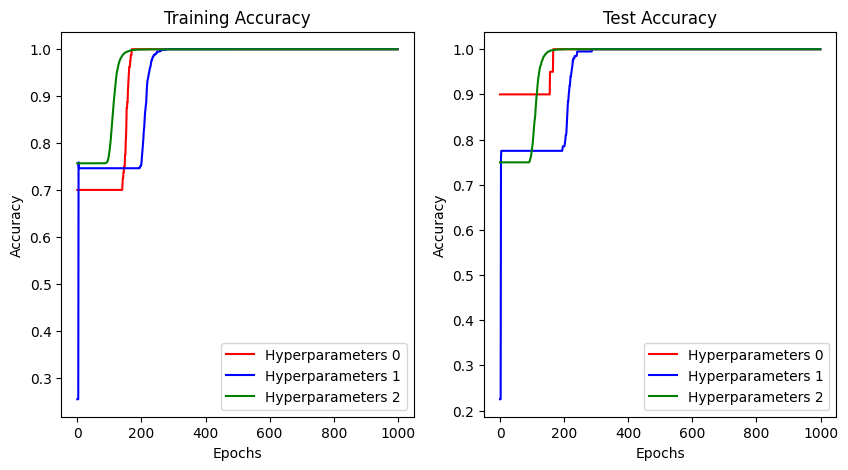

In [300]:
plotLoss(loss_per_epoch, test_loss, num_samples, epochs)
plotAccuracy(accuracy_per_epoch, test_accuracy, num_samples, epochs)

In [301]:
num_samples = [100, 1000, 10000]
train_fraction = 0.8
epochs = 1000
lr = 1
batch_size = 0

loss_per_epoch = []
test_loss = []
accuracy_per_epoch = []
test_accuracy = []

for N in num_samples:
    X, y = XOR_dataset(N)
    model_XOR = ANN(2, 2, 1)
    model_XOR.train((X, y), train_fraction, epochs, lr, batch_size, verbose = False)
    loss_per_epoch.append(model_XOR.loss_per_epoch)
    test_loss.append(model_XOR.loss_test)
    accuracy_per_epoch.append(model_XOR.accuracy_per_epoch)
    test_accuracy.append(model_XOR.accuracy_test)

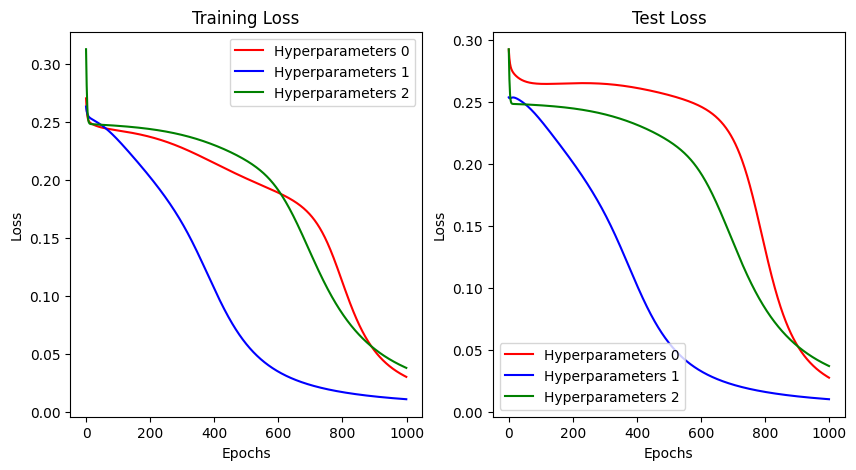

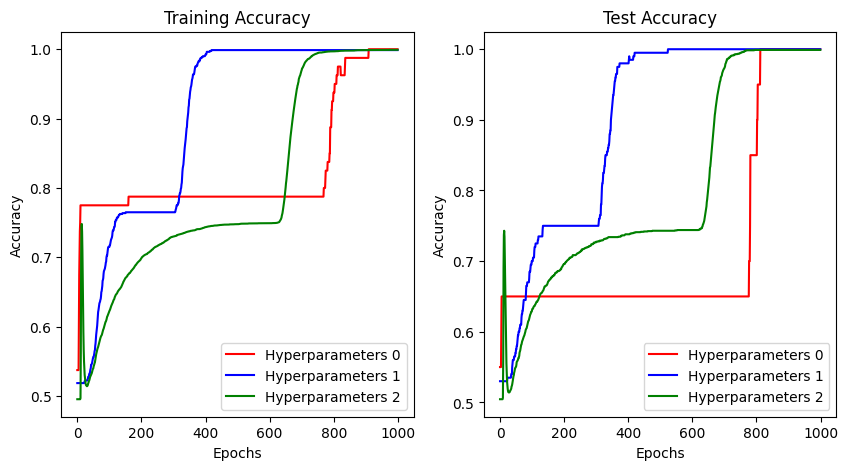

In [302]:
plotLoss(loss_per_epoch, test_loss, num_samples, epochs)
plotAccuracy(accuracy_per_epoch, test_accuracy, num_samples, epochs)

In [309]:
batch_sizes = [32, 64, 128]
train_fraction = 0.8
epochs = 500
lr = 1 
N = 10000

loss_per_epoch = []
test_loss = []
accuracy_per_epoch = []
test_accuracy = []

for batch_size in batch_sizes:
    X, y = OR_dataset(N)
    model_OR = ANN(2, 2, 1)
    model_OR.train((X, y), train_fraction, epochs, lr, batch_size, verbose = False)
    loss_per_epoch.append(model_OR.loss_per_epoch)
    test_loss.append(model_OR.loss_test)
    accuracy_per_epoch.append(model_OR.accuracy_per_epoch)
    test_accuracy.append(model_OR.accuracy_test)

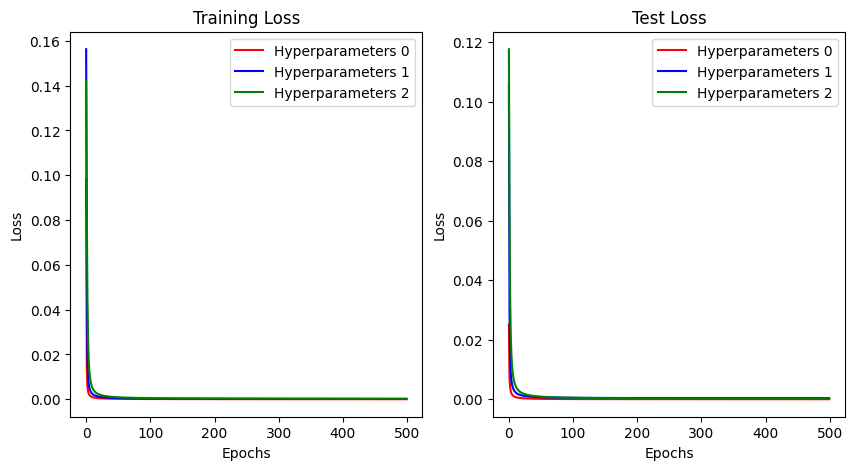

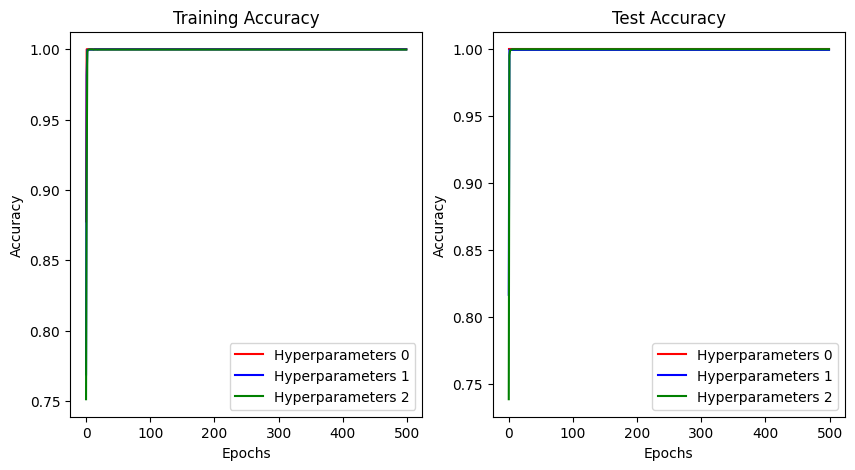

In [310]:
plotLoss(loss_per_epoch, test_loss, batch_sizes, epochs)
plotAccuracy(accuracy_per_epoch, test_accuracy, batch_sizes, epochs)

In [311]:
batch_sizes = [32, 64, 128]
train_fraction = 0.8
epochs = 500
lr = 1
N = 10000

loss_per_epoch = []
test_loss = []
accuracy_per_epoch = []
test_accuracy = []

for batch_size in batch_sizes:
    X, y = AND_dataset(N)
    model_AND = ANN(2, 2, 1)
    model_AND.train((X, y), train_fraction, epochs, lr, batch_size, verbose = False)
    loss_per_epoch.append(model_AND.loss_per_epoch)
    test_loss.append(model_AND.loss_test)
    accuracy_per_epoch.append(model_AND.accuracy_per_epoch)
    test_accuracy.append(model_AND.accuracy_test)

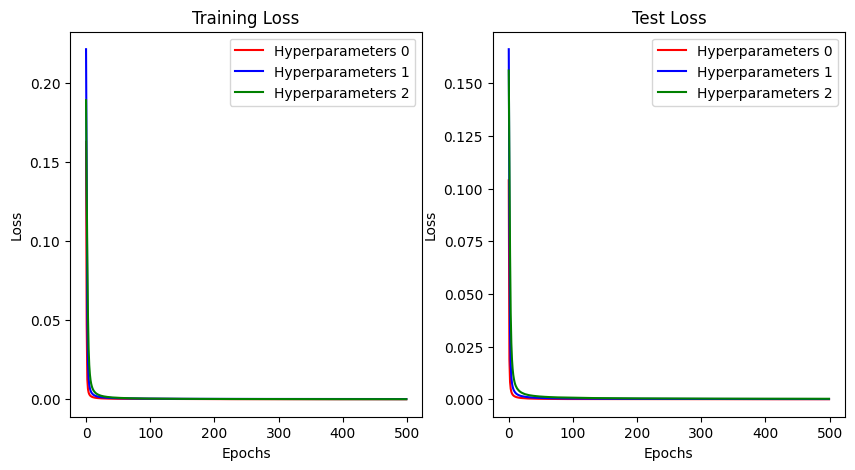

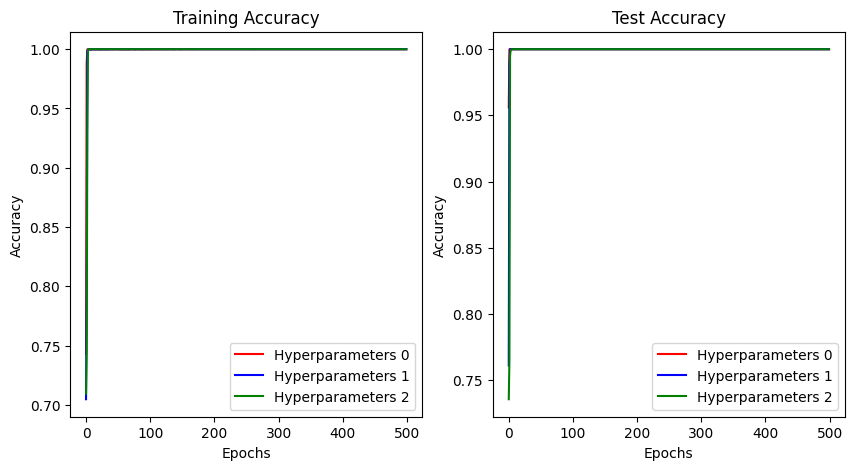

In [312]:
plotLoss(loss_per_epoch, test_loss, batch_sizes, epochs)
plotAccuracy(accuracy_per_epoch, test_accuracy, batch_sizes, epochs)

In [317]:
batch_sizes = [32, 64, 128]
train_fraction = 0.8
epochs = 500
lr = 0.1
N = 10000

loss_per_epoch = []
test_loss = []
accuracy_per_epoch = []
test_accuracy = []

X, y = XOR_dataset(N)

for batch_size in batch_sizes:
    model_XOR = ANN(2, 2, 1)
    model_XOR.train((X, y), train_fraction, epochs, lr, batch_size, verbose = False)
    loss_per_epoch.append(model_XOR.loss_per_epoch)
    test_loss.append(model_XOR.loss_test)
    accuracy_per_epoch.append(model_XOR.accuracy_per_epoch)
    test_accuracy.append(model_XOR.accuracy_test)

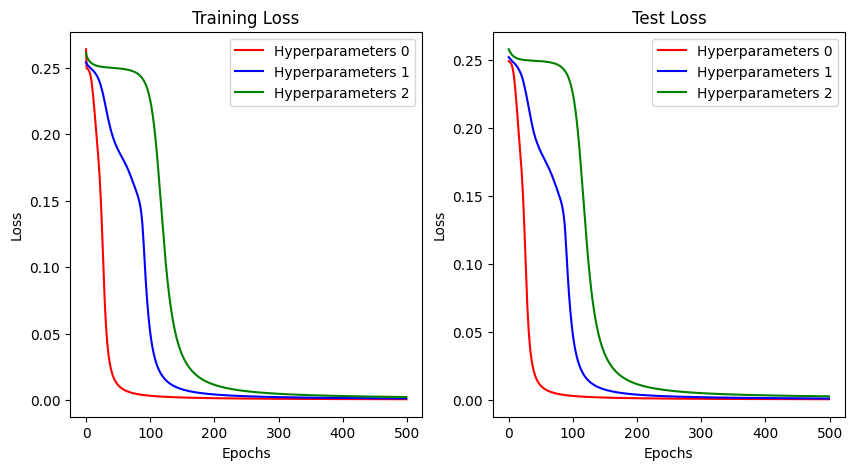

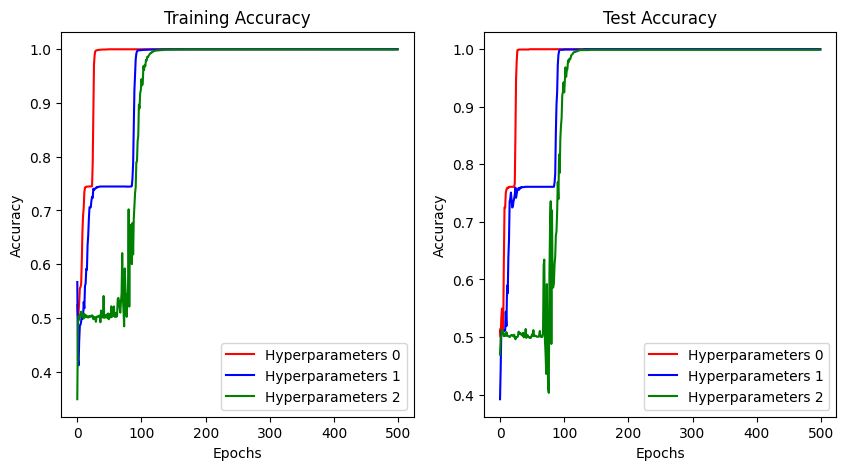

In [318]:
plotLoss(loss_per_epoch, test_loss, batch_sizes, epochs)
plotAccuracy(accuracy_per_epoch, test_accuracy, batch_sizes, epochs)

Note that from the three implementations, it is clear that the logic XOR is harder to predict than the logics AND and OR. In order to ensure XOR performs well, a change in the learning rate or number of epochs is necessary.

From the batch size plots, it can be seen that the lower batch sizes reach higher accuracies and lower losses faster. It is important to note that this trend need not be the case for all experiments.